# Negation scope - with bag of words
## Loading dataset

In [1]:
from datetime import datetime
from negation_scope_common import create_semi_dataset, create_vectorizer, create_columns_names
from negation_scope_common import create_features_list, save_to_csv
from utils import get_datasets


def create_dataset(dataset, sufix):
    ouput_name = '{}.csv'.format(dataset[:-4])
    print('{} START Creating semi dataset {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))
    X_train, X_test = create_semi_dataset(dataset)
    vect_lemma = create_vectorizer(X_train)
    column_names = create_columns_names(X_train, vect_lemma, add_bow=True)
    print('{} START Creating features list {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))
    X_train_features_list = create_features_list(X_train, vect_lemma, add_bow=True)
    X_test_features_list = create_features_list(X_test, vect_lemma, add_bow=True)
    print('{} START Save csv {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))
    save_to_csv(ouput_name + sufix + '-train', column_names, X_train_features_list)
    save_to_csv(ouput_name + sufix + '-test', column_names, X_test_features_list)
    print('{} START Save csv {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))


# for dataset in get_datasets():
#     create_dataset(dataset, '-sco-bow')

In [2]:
create_dataset('dataset/snk/merged.xml', '-sco-bow')

2017-05-09 00:13:08 START Creating semi dataset dataset/snk/merged.xml


2017-05-09 00:13:08 START Creating features list dataset/snk/merged.xml


2017-05-09 00:14:58 START Save csv dataset/snk/merged.xml


2017-05-09 00:16:16 START Save csv dataset/snk/merged.xml


## Training

In [3]:
%%time
from negation_common import load_dataset

df_train, df_test, df2_train, df2_test = load_dataset('dataset/snk/merged.csv', 
                                                      '-sco-bow', 
                                                      ['token', 'lemma', 'POS', 'is_in_scope', 'negator_pos'])

CPU times: user 31.2 s, sys: 2.83 s, total: 34 s
Wall time: 36.2 s


In [4]:
%%time
# Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# model = MultinomialNB()
# model = GaussianNB()
# model = BernoulliNB()
# model = SVC()
model = RandomForestClassifier()

# Train the model using the training sets 
model.fit(df2_train, df_train.is_in_scope)

CPU times: user 5.75 s, sys: 1.3 s, total: 7.05 s
Wall time: 8.1 s


## Metrics

In [5]:
from utils import print_score_for

y_true, y_pred = print_score_for(model, df2_test, y_true=df_test.is_in_scope)

Accuracy: 0.911969111969112
Precision: 0.9278350515463918
Recall: 0.28938906752411575
F1 score: 0.4411764705882353
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      2279
          1       0.93      0.29      0.44       311

avg / total       0.91      0.91      0.89      2590



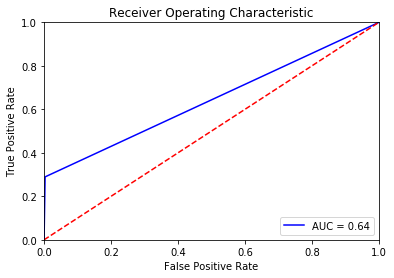

In [6]:
from utils import show_roc_curve

show_roc_curve(y_true, y_pred).show()

In [8]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

param_grid = {"n_estimators": [60, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# param_grid = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 5, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# create and fit a ridge regression model, testing each alpha
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metrics.make_scorer(metrics.f1_score))
grid.fit(df2_train, df_train.is_in_scope)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 100, 200], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)
0.480003875323
{'n_estimators': 100, 'bootstrap': False, 'criterion': 'entropy'}


In [ ]:
import pickle
with open('model-gaussian-sco.pkl', 'wb') as fout:
    pickle.dump(model, fout)

## Playground

In [8]:
df2_train
df2_train.columns[df2_train.isnull().any()].tolist()

['word5_žiť']

In [ ]:
df2_train.loc[:, df2_train.isnull().any()]

In [9]:
df_train

,token,lemma,POS,has_sk_prefix,has_int_prefix,is_particle,word_without_prefix_exist,start_with_ne,is_in_scope,is_negator,...,word5_žabka,word5_že,word5_žena,word5_ženský,word5_žiaden,word5_žiadosť,word5_živkoviča,word5_život,word5_životný,word5_žiť
0,Na,na,Eu4,False,False,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,rozdiel,rozdiel,SSis4,True,False,False,True,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
2,od,od,Eu2,False,False,False,False,0,0,2,...,0,0,0,0,0,0,0,0,0,NaN
3,Descartesa,Descartesa,NUnp2,False,False,False,False,0,0,3,...,0,0,0,0,0,0,0,0,0,NaN
4,ďalší,ďalší,AAms1x,False,False,False,False,0,0,4,...,0,0,0,0,0,0,0,0,0,NaN
5,významný,významný,AAms1x,False,False,False,False,0,0,5,...,0,0,0,0,0,0,0,0,0,NaN
6,racionalista,racionalista,SSms1,False,False,False,False,0,0,6,...,0,0,0,0,0,0,0,0,0,NaN
7,novoveku,novovek,SSis2,False,False,False,False,0,0,7,...,0,0,0,0,0,0,0,0,0,NaN
8,",",",",Z,False,False,False,False,0,0,8,...,0,0,0,0,0,0,0,0,0,NaN
9,holandský,holandský,AAms1x,False,False,False,False,1,0,9,...,0,0,0,0,0,0,0,0,0,NaN
